In [1]:
# Imports the method used to connect to DBs
from sqlalchemy import create_engine

# Imports the methods needed to abstract python classes into database tables
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# function to establish a session with a connected database
from sqlalchemy.orm import Session

# database compliant datatypes
from sqlalchemy import Column, Integer, String, Float

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#create database connection

In [3]:
# variables to populate the database connection string
db_user = 'postgres'
db_password = '...'
db_host = 'localhost'
db_port = 5432

# This database must already exist
db_name = "SQL_homework"

engine = create_engine(f"postgres://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

In [4]:
df = pd.read_sql_query("SELECT * FROM salaries",engine)

In [5]:
df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [6]:
salary_list = df['salary'].tolist()

In [16]:
len(salary_list)

300024

(array([1.22959e+05, 2.87840e+04, 2.81920e+04, 2.55870e+04, 2.23920e+04,
        1.87060e+04, 1.54210e+04, 1.18920e+04, 9.13900e+03, 6.42600e+03,
        4.34500e+03, 2.86400e+03, 1.63900e+03, 8.48000e+02, 4.47000e+02,
        2.22000e+02, 1.01000e+02, 4.20000e+01, 1.30000e+01, 5.00000e+00]),
 array([ 40000. ,  44474.6,  48949.2,  53423.8,  57898.4,  62373. ,
         66847.6,  71322.2,  75796.8,  80271.4,  84746. ,  89220.6,
         93695.2,  98169.8, 102644.4, 107119. , 111593.6, 116068.2,
        120542.8, 125017.4, 129492. ]),
 <a list of 20 Patch objects>)

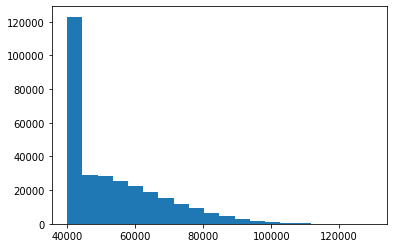

In [17]:
plt.hist(salary_list,20)

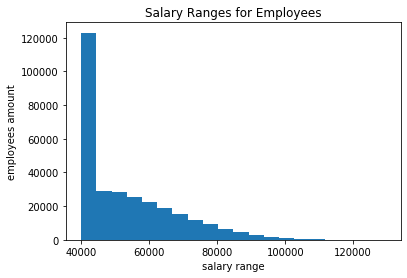

In [20]:
salary_bin = 20
plt.hist(salary_list,salary_bin)
plt.xlabel('salary range')
plt.ylabel('employees amount')
plt.title('Salary Ranges for Employees')
plt.show()

In [32]:
avg_df = pd.read_sql_query(
"select t.title, AVG(s.salary)AS average_salary from salaries AS s INNER JOIN titles AS t ON s.emp_no = t.emp_no GROUP BY t.title;"
,engine)

In [37]:
avg_df.keys()

Index(['title', 'average_salary'], dtype='object')

In [39]:
avg_list = avg_df['average_salary'].tolist()
title_list = avg_df['title'].tolist()

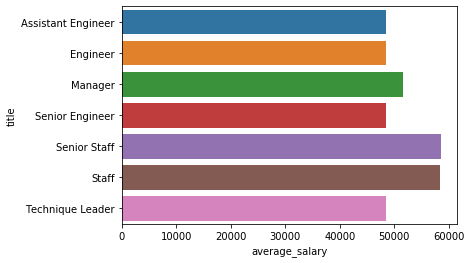

In [49]:
sns.barplot(x = "average_salary",y = "title" , data = avg_df)
